In [ ]:
#import Deep Learning related libraries
import pandas as pd
import sklearn
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgrey'})

In [ ]:
#load data
filename = "datafix.csv"
dataset = pd.read_csv(filename)

In [ ]:
#show dataset
dataset

,tanggal,snp500_high,snp500_low,bitcoin_high,bitcoin_low,oil_high,oil_low,gold_high,gold_low,euro_to_usd_rate,us_interest_rate
0,2015-01-02,2072.36,2046.04,2676.0,2488.6,55.11,52.03,1193.3,1171.6,12.003,0.13
1,2015-01-05,2054.44,2017.34,2617.8,2518.8,52.73,49.68,1205.2,1189.1,11.934,0.13
2,2015-01-06,2030.25,1992.44,2800.5,2614.0,50.37,47.55,1222.0,1206.0,11.889,0.13
3,2015-01-07,2029.61,2005.55,2804.4,2624.4,49.31,46.83,1217.5,1210.0,11.839,0.13
4,2015-01-08,2064.08,2030.61,2757.3,2623.2,49.65,47.73,1216.4,1206.9,11.793,0.13
...,...,...,...,...,...,...,...,...,...,...,...
1987,2022-11-22,4005.88,3956.88,16686.3,16387.9,82.36,79.86,1751.0,1737.6,1.031,1.41
1988,2022-11-23,4033.78,3998.66,16595.4,16414.6,81.95,76.83,1754.9,1719.0,10.418,1.41
1989,2022-11-25,4034.02,4020.76,16481.4,16060.8,79.89,76.23,1761.2,1745.9,10.402,1.41
1990,2022-11-28,4235.00,4120.00,16475.1,16016.3,77.70,73.70,1763.7,1739.6,0.970,0.50


In [ ]:
#processing dataset

#delete the columns that we can't generalize over, thus useless for predictive model.
dataset = dataset.drop(columns=['snp500_low'])
dataset = dataset.drip(columns=['date'])

dataset

#defining features and labels
labels = dataset.iloc[:,-1]
features = dataset.iloc[:,0:-1]
print(labels.shape, features.shape)

#apply one-hot-encoding to categorical columns
features = pd.get_dummies(features)

#split features and labels for training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=12)

#select columns with numerical features (returns a list of column name with numerical data)
numerical_features = features.select_dtypes(include = ['float64', 'int64'])
numerical_columns = numerical_features.columns

#defines a ColumnTransformer
ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')

#normalize values in features dataset
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

#ct.transform and fit_transform returns numpy array, convert back to dataframe
features_train_scaled = pd.DataFrame(features_train_scaled, columns = features_train.columns)
features_test_scaled = pd.DataFrame(features_test_scaled, columns = features_test.columns)

AttributeError: ignored

In [ ]:
#building the deep learning model

#create an instance of a Sequential model
my_model = Sequential()

#defining and adding an input layer
num_features = features_train_scaled.shape[1]
input = InputLayer(input_shape = (num_features),)
my_model.add(input)

#adding hidden layer with 64 units and relu activation function
my_model.add(Dense(64, activation = "relu"))

#adding an output layer
my_model.add(Dense(1))

#defining an Adam optimizer
my_opt = Adam(learning_rate = 0.01)

#specify loss function, metrics, and optimizer
my_model.compile(loss = 'mse', metrics = ['mae'], optimizer = my_opt)

In [ ]:
features_train_scaled

,snp500_high,bitcoin_high,bitcoin_low,oil_high,oil_low,gold_high,gold_low,euro_to_usd_rate,tanggal_2015-01-02,tanggal_2015-01-05,...,tanggal_2022-11-15,tanggal_2022-11-16,tanggal_2022-11-17,tanggal_2022-11-18,tanggal_2022-11-21,tanggal_2022-11-22,tanggal_2022-11-23,tanggal_2022-11-25,tanggal_2022-11-28,tanggal_2022-11-29
0,-1.327847,-0.603035,-0.615731,-1.458897,-1.496009,-1.070401,-1.134963,0.324739,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.228442,2.294315,2.374803,-1.001073,-0.977439,1.247412,1.236447,-2.639783,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.424803,-0.466935,-0.477149,-0.035333,-0.004632,-0.645463,-0.659647,0.541050,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.305340,-0.714227,-0.697787,-0.295485,-0.284335,-0.552157,-0.527430,0.373793,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.105034,-0.755127,-0.742579,-0.548635,-0.617741,-0.397009,-0.407401,0.300212,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,0.355754,0.011893,0.023077,-0.014327,0.030052,0.339671,0.358940,0.317056,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1330,0.353036,0.128888,0.065869,-0.341267,-0.319577,0.432977,0.457918,-2.646875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1331,0.466413,2.259354,2.352434,-0.913817,-0.881221,1.773974,1.769746,0.526275,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332,1.710828,1.053867,1.121704,0.651403,0.687913,1.120111,1.126389,0.491405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#training the model
my_model.fit(features_train_scaled, labels_train, epochs =10, batch_size = 1, verbose = 1)

Epoch 1/10
1334/1334 [==============================] - 2s 1ms/step - loss: 0.1857 - mae: 0.3172
Epoch 2/10
1334/1334 [==============================] - 2s 1ms/step - loss: 0.1338 - mae: 0.2725
Epoch 3/10
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0859 - mae: 0.2269
Epoch 4/10
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0386 - mae: 0.1529
Epoch 5/10
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0279 - mae: 0.1311
Epoch 6/10
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0222 - mae: 0.1164
Epoch 7/10
1334/1334 [==============================] - 3s 3ms/step - loss: 0.0210 - mae: 0.1128
Epoch 8/10
1334/1334 [==============================] - 4s 3ms/step - loss: 0.0199 - mae: 0.1106
Epoch 9/10
1334/1334 [==============================] - 3s 3ms/step - loss: 0.0180 - mae: 0.1025
Epoch 10/10
1334/1334 [==============================] - 4s 3ms/step - loss: 0.0155 - mae: 0.0975


In [ ]:
#evaluating the model
res_mse, res_mae = my_model.evaluate(features_test_scaled, labels_test, verbose = 0)
print("mse: ",res_mse," mae: ",res_mae)

mse:  0.0983608216047287  mae:  0.24003075063228607


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tanggal           1992 non-null   object 
 1   snp500_high       1992 non-null   float64
 2   bitcoin_high      1992 non-null   float64
 3   bitcoin_low       1992 non-null   float64
 4   oil_high          1992 non-null   float64
 5   oil_low           1992 non-null   float64
 6   gold_high         1992 non-null   float64
 7   gold_low          1992 non-null   float64
 8   euro_to_usd_rate  1992 non-null   float64
 9   us_interest_rate  1992 non-null   float64
dtypes: float64(9), object(1)
memory usage: 155.8+ KB


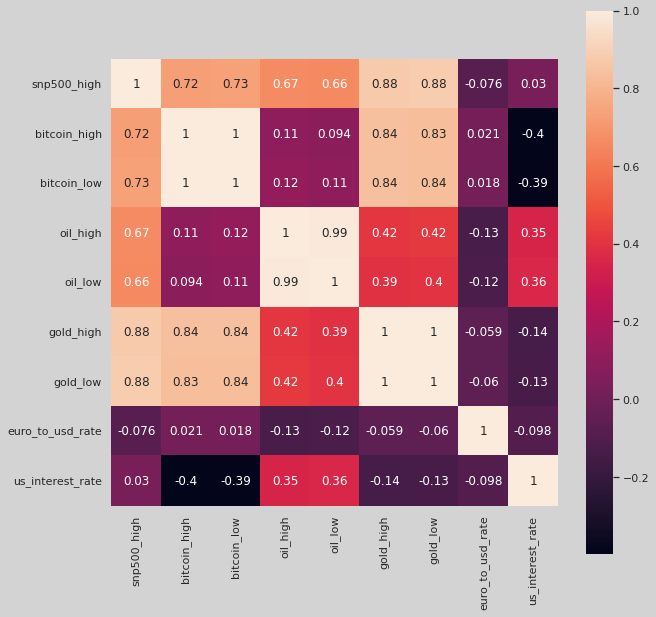

In [ ]:
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), square=True,annot=True)
plt.show()

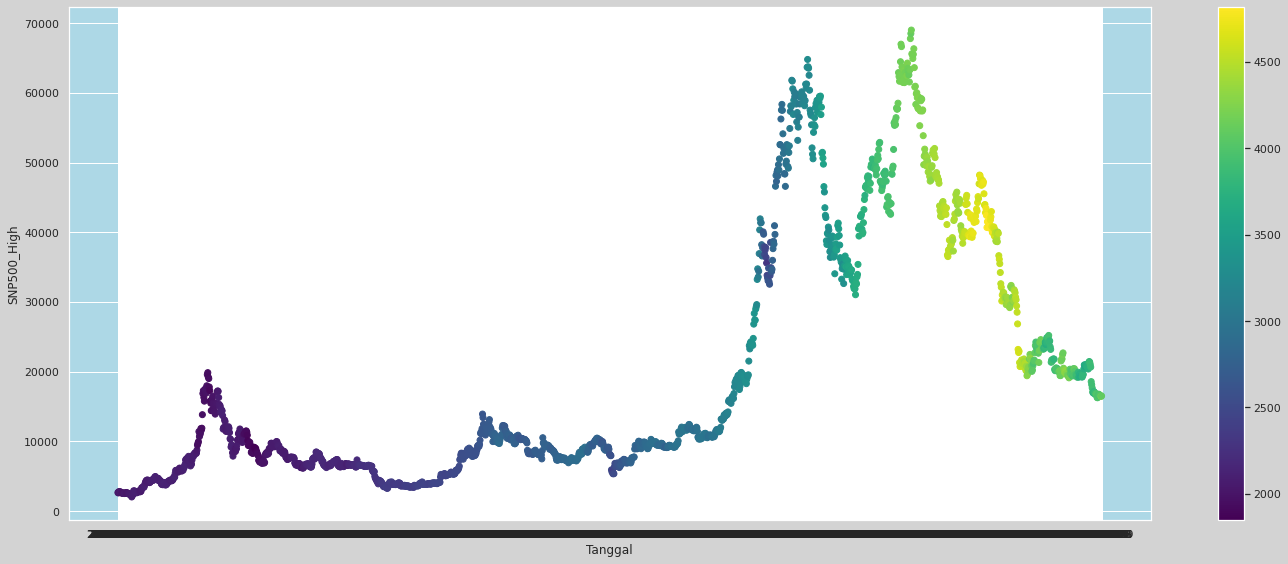

In [ ]:
# SNP500_High - Bitcoin_High

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['bitcoin_high'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()

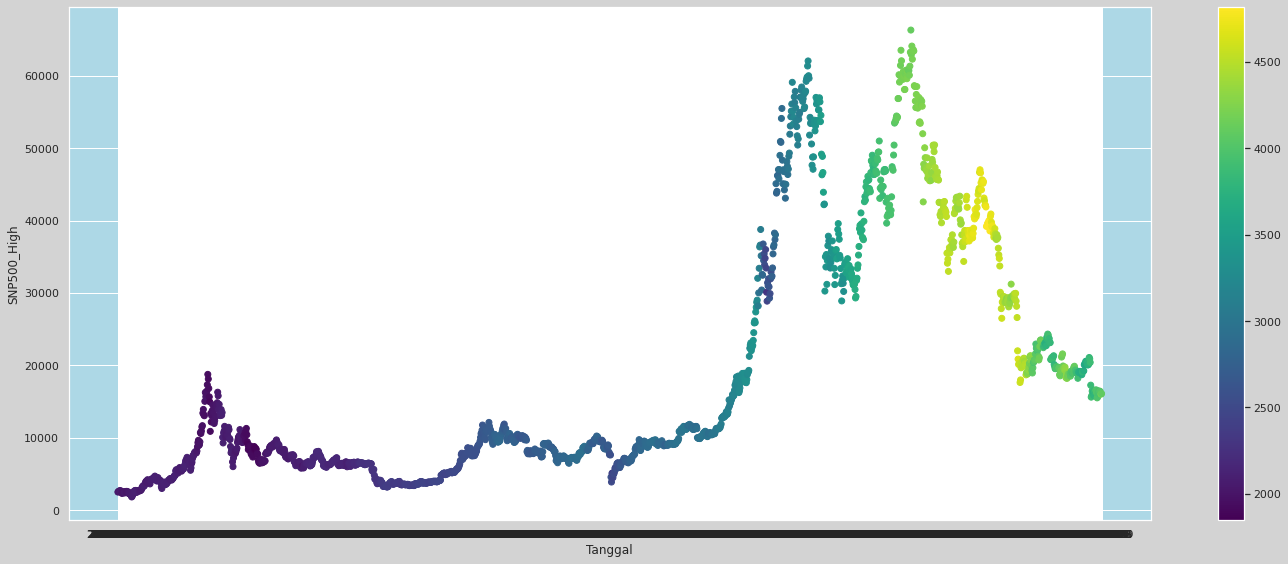

In [ ]:
# SNP500_High - Bitcoin_Low

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['bitcoin_low'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()

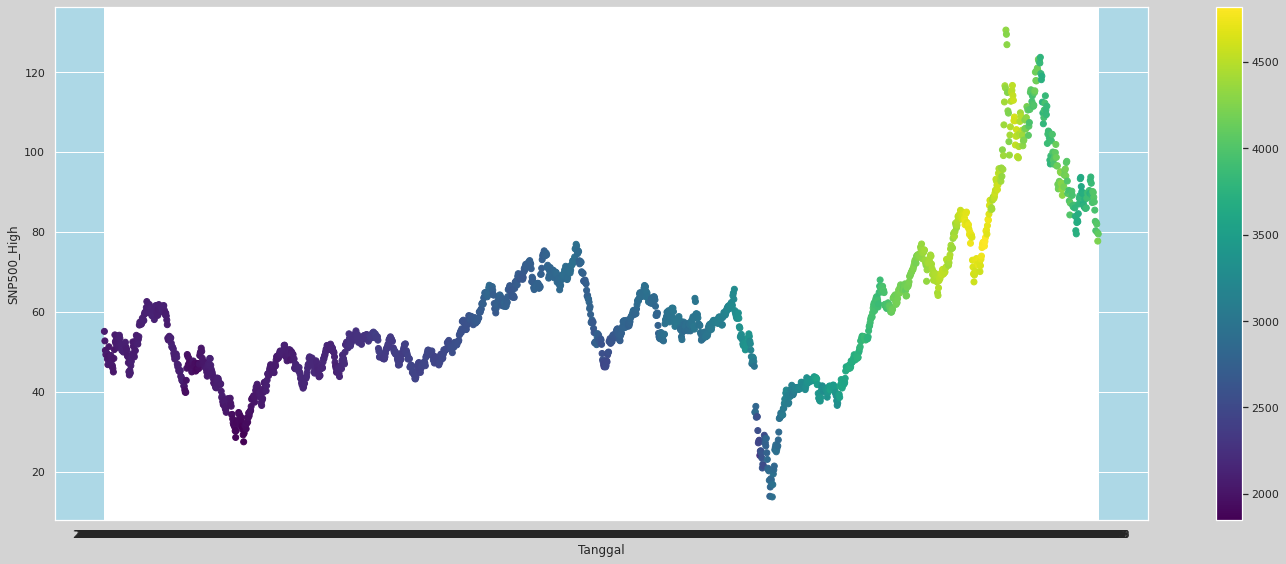

In [ ]:
# SNP500_High - Oil_High

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['oil_high'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()

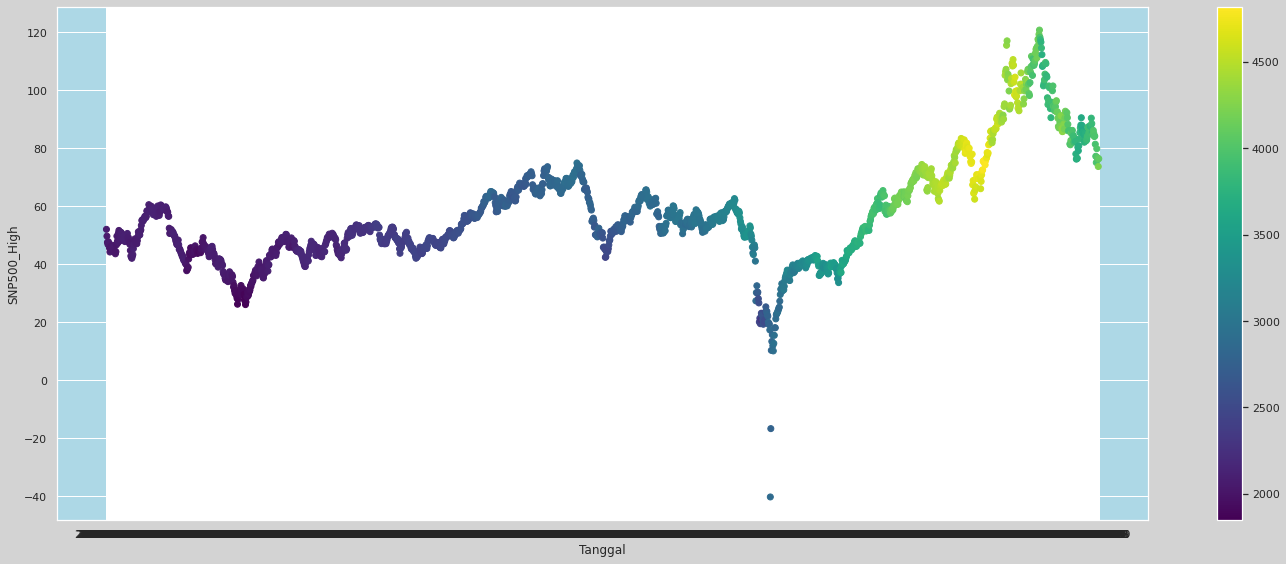

In [ ]:
# SNP500_High - Oil_Low

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['oil_low'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()

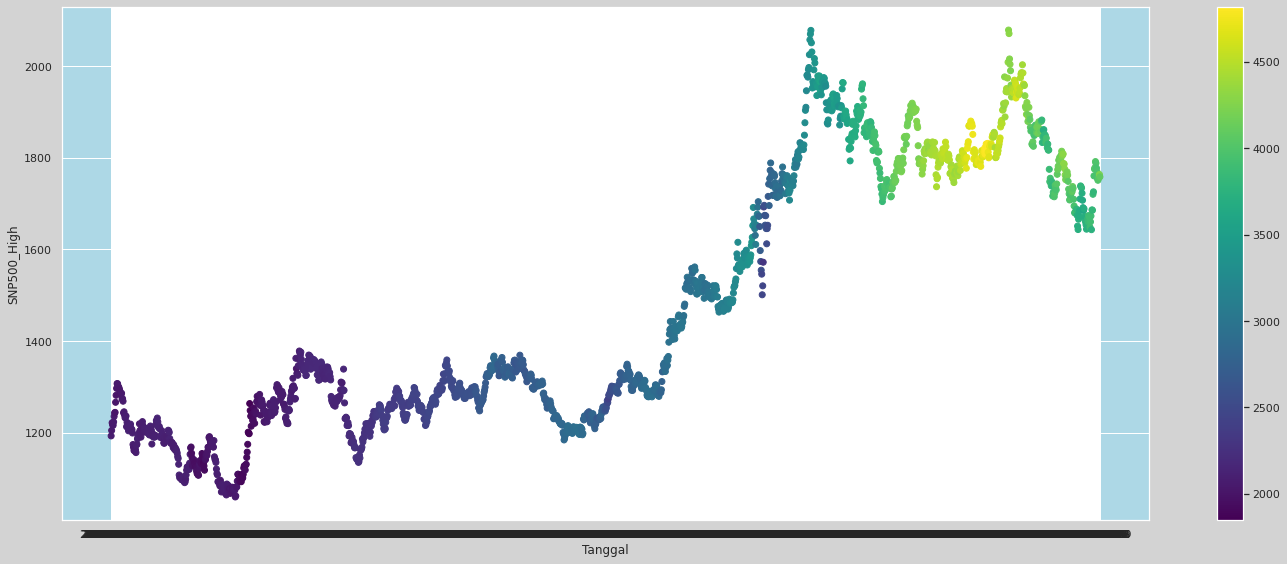

In [ ]:
# SNP500_High - Gold_High

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['gold_high'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()

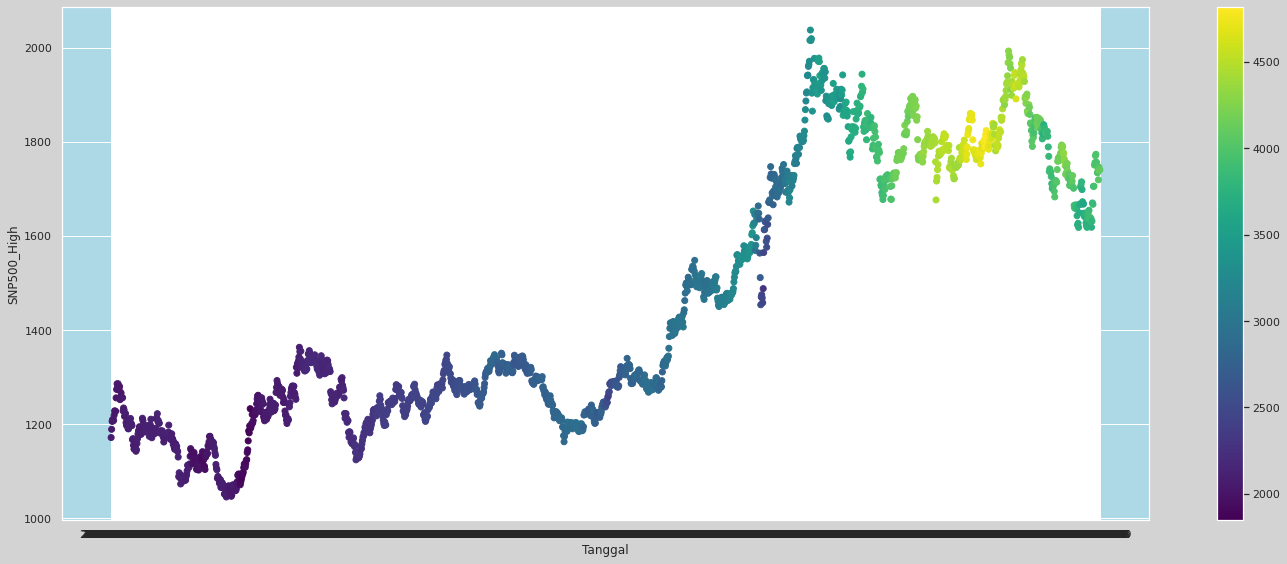

In [ ]:
# SNP500_High - Gold_Low

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['gold_low'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()

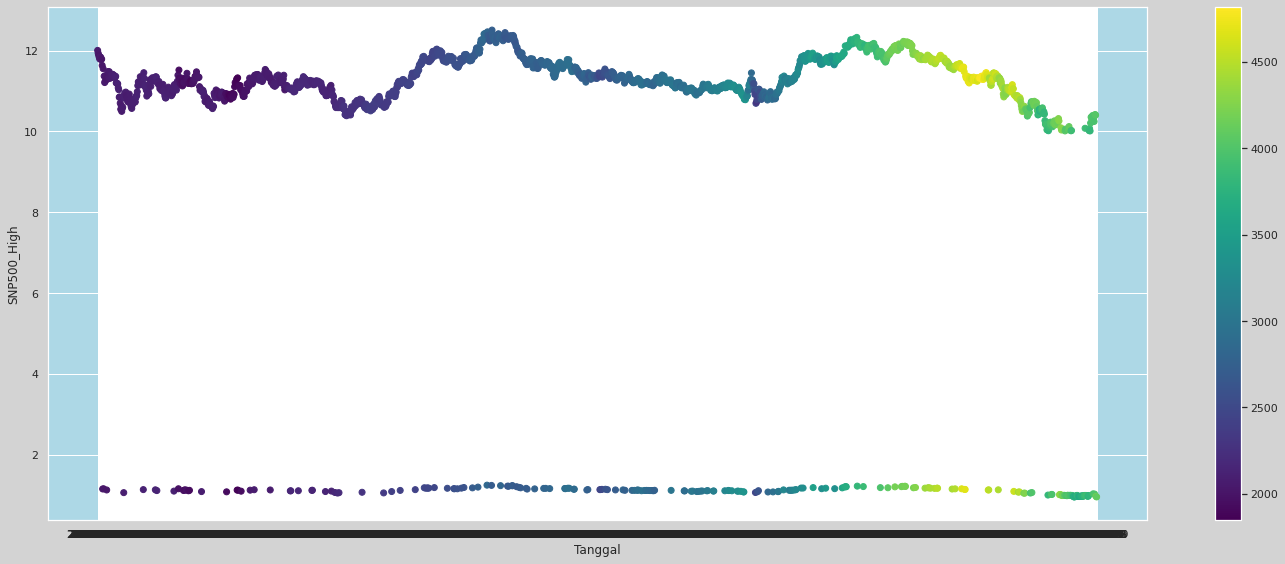

In [ ]:
# SNP500_High - Euro_to_USD_Rate

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['euro_to_usd_rate'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()

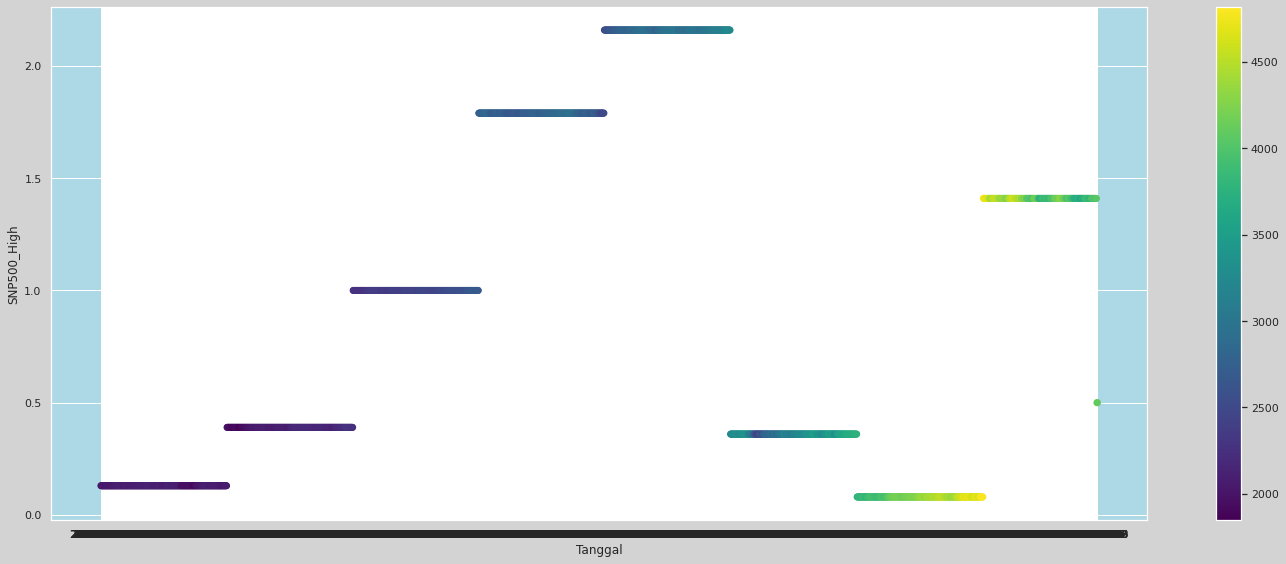

In [ ]:
# SNP500_High - US_Interest_Rate

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x=dataset['tanggal'], y=dataset['us_interest_rate'], c=dataset['snp500_high'], cmap='viridis')
plt.xlabel('Tanggal')
plt.ylabel('SNP500_High')
plt.colorbar()
plt.show()